In [4]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [6]:
df =pd.read_csv("train.csv",encoding='unicode_escape')

In [7]:
df.shape

(550068, 12)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
pd.isnull(df).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
pd.isnull(df).sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


Converting to lower case for easier usability

In [15]:
df.rename(columns=str.lower,inplace=True) 

In [16]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [17]:
df.gender.unique()

array(['F', 'M'], dtype=object)

In [18]:
df.age.unique()

array(['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [19]:
df.occupation.unique(),len(df.occupation.unique()),df.occupation.dtype

(array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
        13,  6,  5, 18], dtype=int64),
 21,
 dtype('int64'))

In [20]:
df.city_category.unique()

array(['A', 'B', 'C'], dtype=object)

In [21]:
df.stay_in_current_city_years.unique()

array(['2', '1', '4+', '0', '3'], dtype=object)

In [22]:
df.stay_in_current_city_years=df.stay_in_current_city_years.replace("4+",'4').astype(int)
df.stay_in_current_city_years.unique()

array([2, 1, 4, 0, 3])

In [23]:
df.marital_status.unique()

array([0, 1], dtype=int64)

In [24]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [25]:
df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  166821 non-null  int64  
 1   product_category_2  166821 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 5.1 MB


In [26]:
df.product_category_1.unique()

array([ 1,  5,  2,  6,  3,  4,  8, 12, 11, 10, 15, 13], dtype=int64)

We have two columns, 'Gender' and 'Occupation.' By analyzing these two columns, we can determine which one provides more valuable information for filling the NaN values in the 'Product Categories' column.

For example:

By examining the 'Age' column, we can analyze which product categories are predominantly used by customers of specific age groups. This analysis can guide us in replacing NaN values with appropriate category values.

By scrutinizing the 'Occupation' column, we can assess which product categories are most frequently favored by customers based on their occupations. This insight can help us replace NaN values with relevant category values.

In the following steps, we will determine which of these columns yields the most valuable insights for addressing the missing values in 'Product Categories.

In [27]:
a=df.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=df.groupby('age')['product_category_3'].agg(pd.Series.mode)
c=df.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=df.groupby('occupation')['product_category_3'].agg(pd.Series.mode)

In [28]:
a,b,c,d

(age
 0-17     2.0
 18-25    2.0
 26-35    2.0
 36-45    2.0
 46-50    2.0
 51-55    2.0
 55+      2.0
 Name: product_category_2, dtype: float64,
 age
 0-17     16.0
 18-25    16.0
 26-35    16.0
 36-45    16.0
 46-50    16.0
 51-55    16.0
 55+      16.0
 Name: product_category_3, dtype: float64,
 occupation
 0     2.0
 1     2.0
 2     2.0
 3     2.0
 4     2.0
 5     2.0
 6     2.0
 7     2.0
 8     2.0
 9     8.0
 10    2.0
 11    2.0
 12    2.0
 13    2.0
 14    2.0
 15    2.0
 16    2.0
 17    2.0
 18    2.0
 19    2.0
 20    2.0
 Name: product_category_2, dtype: float64,
 occupation
 0     16.0
 1     16.0
 2     16.0
 3     16.0
 4     16.0
 5     16.0
 6     16.0
 7     16.0
 8     15.0
 9     16.0
 10    16.0
 11    16.0
 12    15.0
 13    16.0
 14    16.0
 15    16.0
 16    16.0
 17    15.0
 18    16.0
 19    16.0
 20    16.0
 Name: product_category_3, dtype: float64)

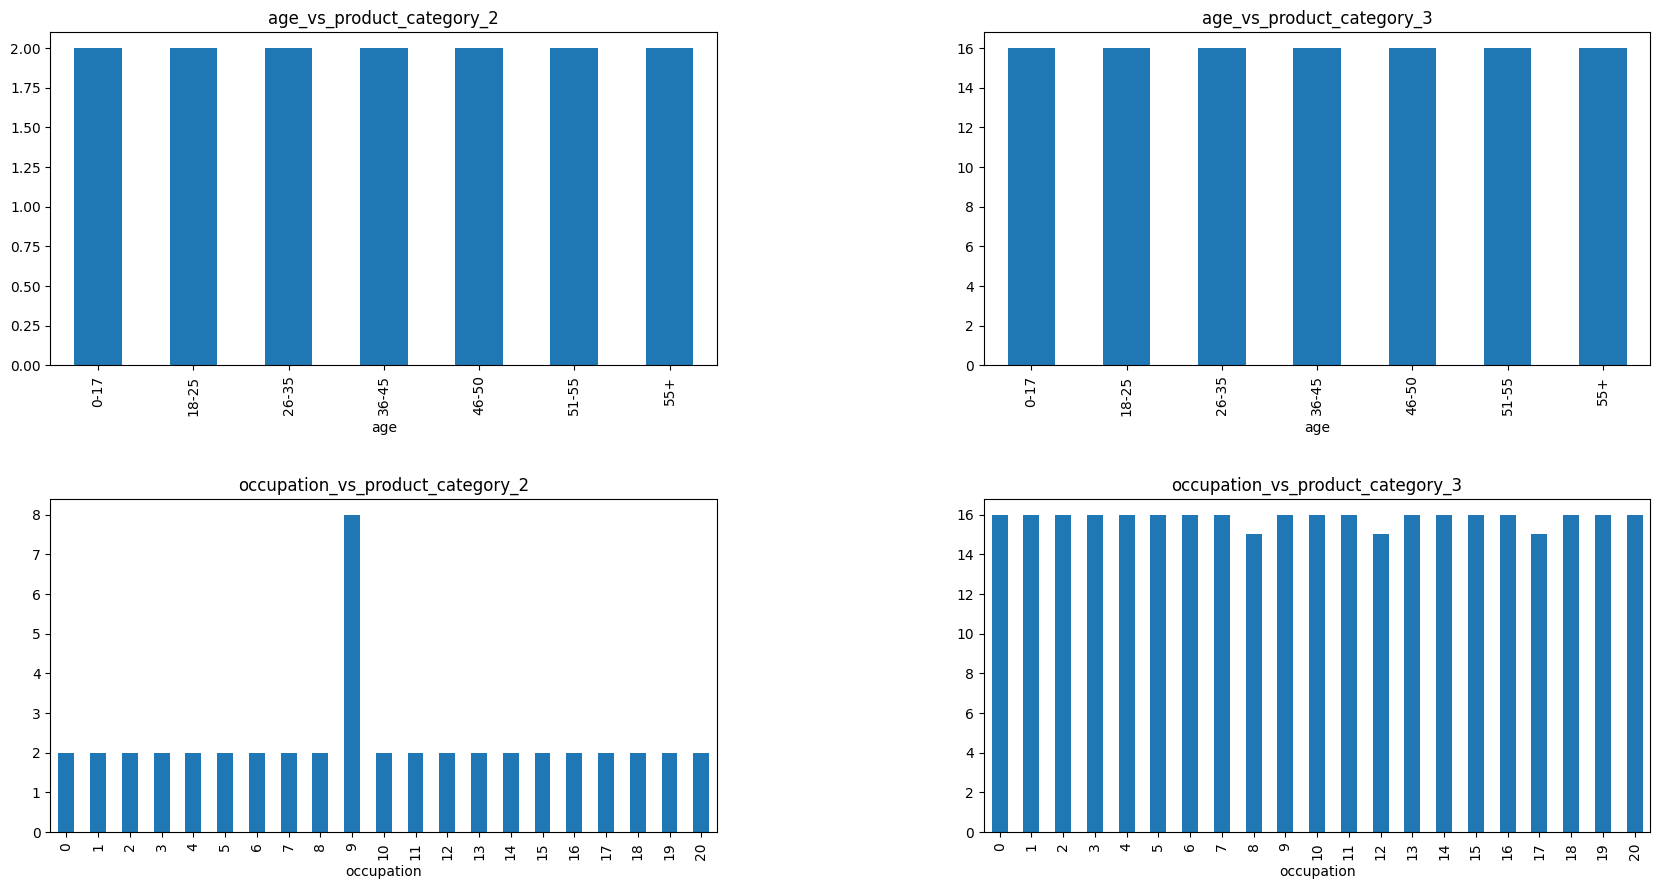

In [29]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.1,
                   bottom=0.1,
                   right=0.9,
                   top=0.9,
                   wspace=0.4,
                   hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()

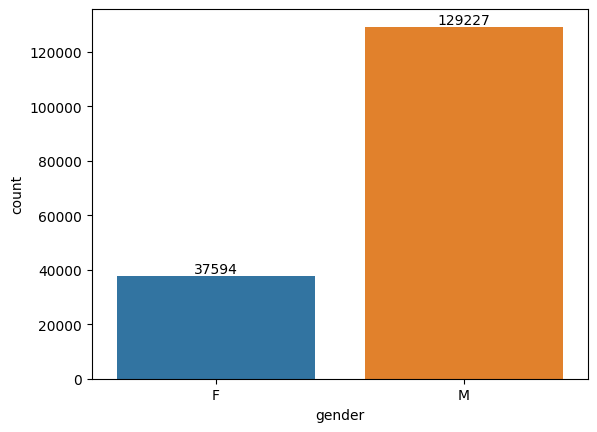

In [30]:
ax = sns.countplot(x = 'gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [31]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [32]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     166821 non-null  int64  
 1   product_id                  166821 non-null  object 
 2   gender                      166821 non-null  object 
 3   age                         166821 non-null  object 
 4   occupation                  166821 non-null  int64  
 5   city_category               166821 non-null  object 
 6   stay_in_current_city_years  166821 non-null  int32  
 7   marital_status              166821 non-null  int64  
 8   product_category_1          166821 non-null  int64  
 9   product_category_2          166821 non-null  float64
 10  product_category_3          166821 non-null  float64
 11  purchase                    166821 non-null  int64  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 15.9+ MB


In [34]:
def fill_nan_category(category_column) :
    x= df.groupby('occupation')[category_column].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
        df.loc[df['occupation']==i,category_column]=df.loc[df['occupation']==i,category_column].fillna(j)

In [35]:
fill_nan_category('product_category_1')
fill_nan_category('product_category_2')
fill_nan_category('product_category_3')
df.product_category_1=df.product_category_1.astype(float)

In [36]:
df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  166821 non-null  float64
 1   product_category_2  166821 non-null  float64
 2   product_category_3  166821 non-null  float64
dtypes: float64(3)
memory usage: 5.1 MB


In [37]:
df.product_category_2.isnull().sum()

0

In [38]:
df.product_category_3.isnull().sum()

0

In [39]:
df.purchase.unique(),df.purchase.isnull().count()

(array([15200, 19215, 15665, ...,  9407,  2323, 18755], dtype=int64), 166821)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     166821 non-null  int64  
 1   product_id                  166821 non-null  object 
 2   gender                      166821 non-null  object 
 3   age                         166821 non-null  object 
 4   occupation                  166821 non-null  int64  
 5   city_category               166821 non-null  object 
 6   stay_in_current_city_years  166821 non-null  int32  
 7   marital_status              166821 non-null  int64  
 8   product_category_1          166821 non-null  float64
 9   product_category_2          166821 non-null  float64
 10  product_category_3          166821 non-null  float64
 11  purchase                    166821 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 15.9+ MB


In [41]:
df.to_csv('./bfs_clean_data.csv')

Data Viz

In [42]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1.0,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1.0,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5.0,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2.0,3.0,4.0,13055


**1) Checking Distribution and Outliers of 'purchase'**

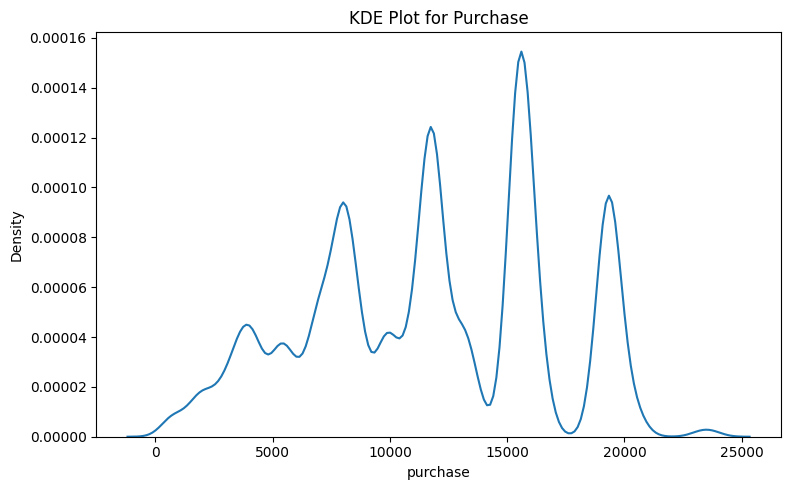

In [43]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(121)  # Subplot 1: KDE plot
sns.kdeplot(data=df['purchase'])
plt.title('KDE Plot for Purchase')

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()

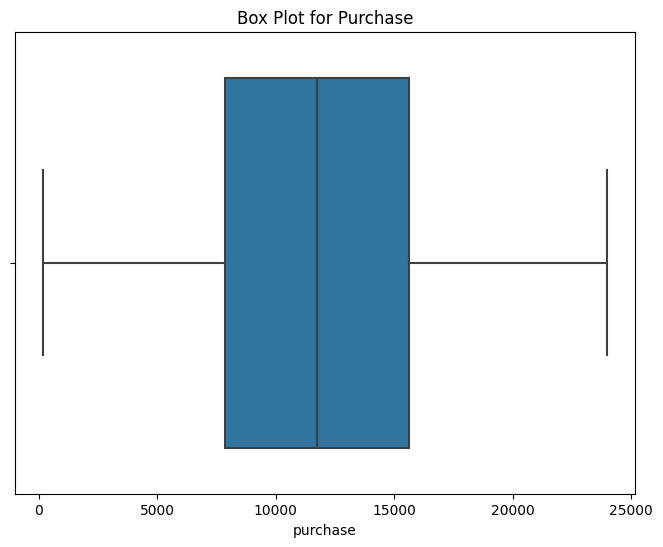

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Specify the DataFrame and column for the box plot
sns.boxplot(data=df, x='purchase')

# Add a title to the plot
plt.title('Box Plot for Purchase')

# Show the plot
plt.show()

**2) Find which kind of customer visits more frequently ? Male or Female?{'M','F'}.**

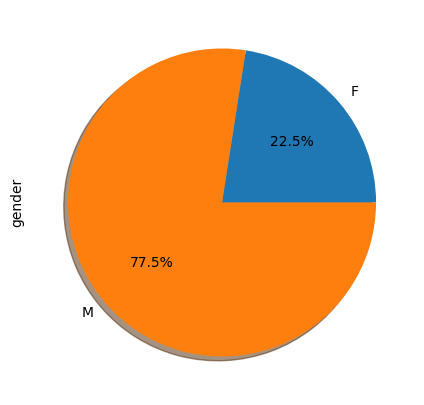

In [45]:
df.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

**3) Purchase Distribution of 'Male' and 'Female' customers.**

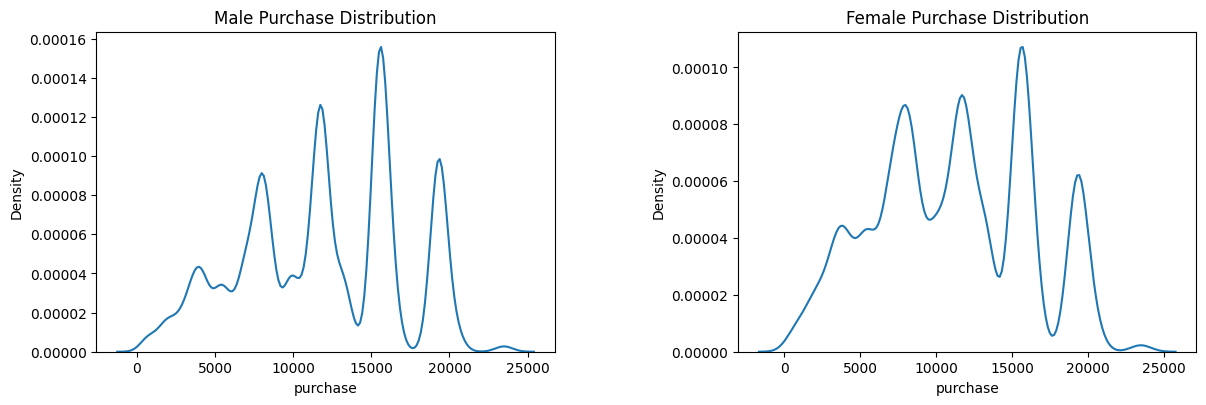

In [46]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

# Create a figure with two subplots
plt.figure(figsize=(10, 4))
plt.subplots_adjust(left=0.1, right=1.2, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Subplot 1: KDE plot for males
plt.subplot(1, 2, 1)
sns.kdeplot(males['purchase'])
plt.title('Male Purchase Distribution')

# Subplot 2: KDE plot for females
plt.subplot(1, 2, 2)
sns.kdeplot(females['purchase'])
plt.title('Female Purchase Distribution')

plt.show()

**4) Finding which kind of customer purchasing more ? Male or Female?{'M','F'}**

,gender,purchase
0,F,416719106
1,M,1528099293


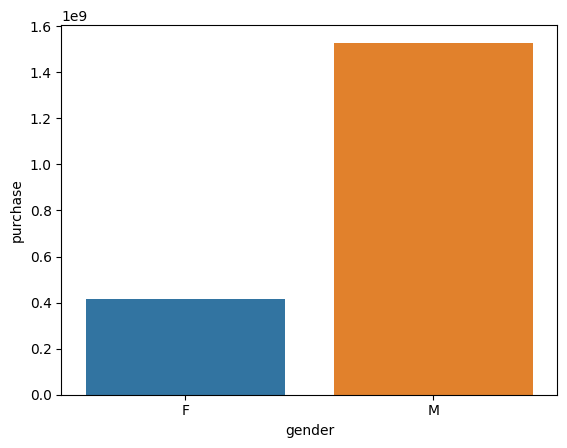

In [47]:
J=df.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=J)
J

As we can see Male customers have purchased more

**5) Find which Product the customer bought the most**

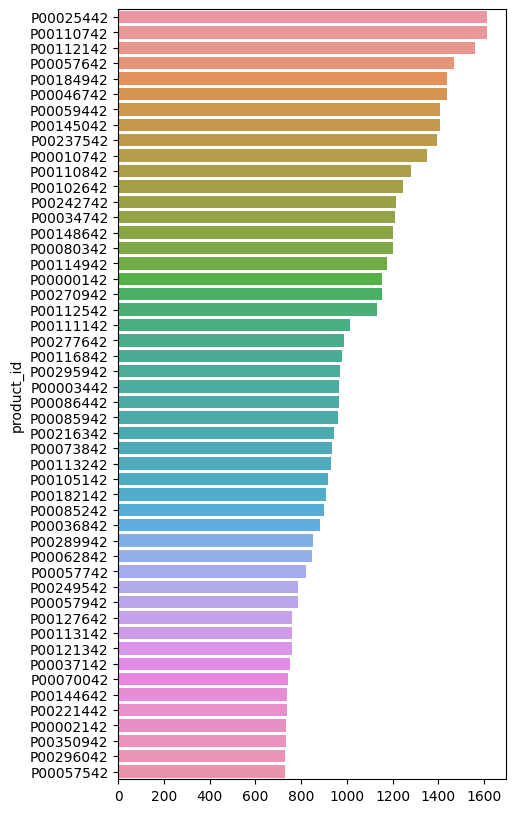

In [48]:
p_id=df.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

**6) Finding the 'sub_product' which is selling the most from each product_category and which customer category is buying that product the most?{'M','F'}**

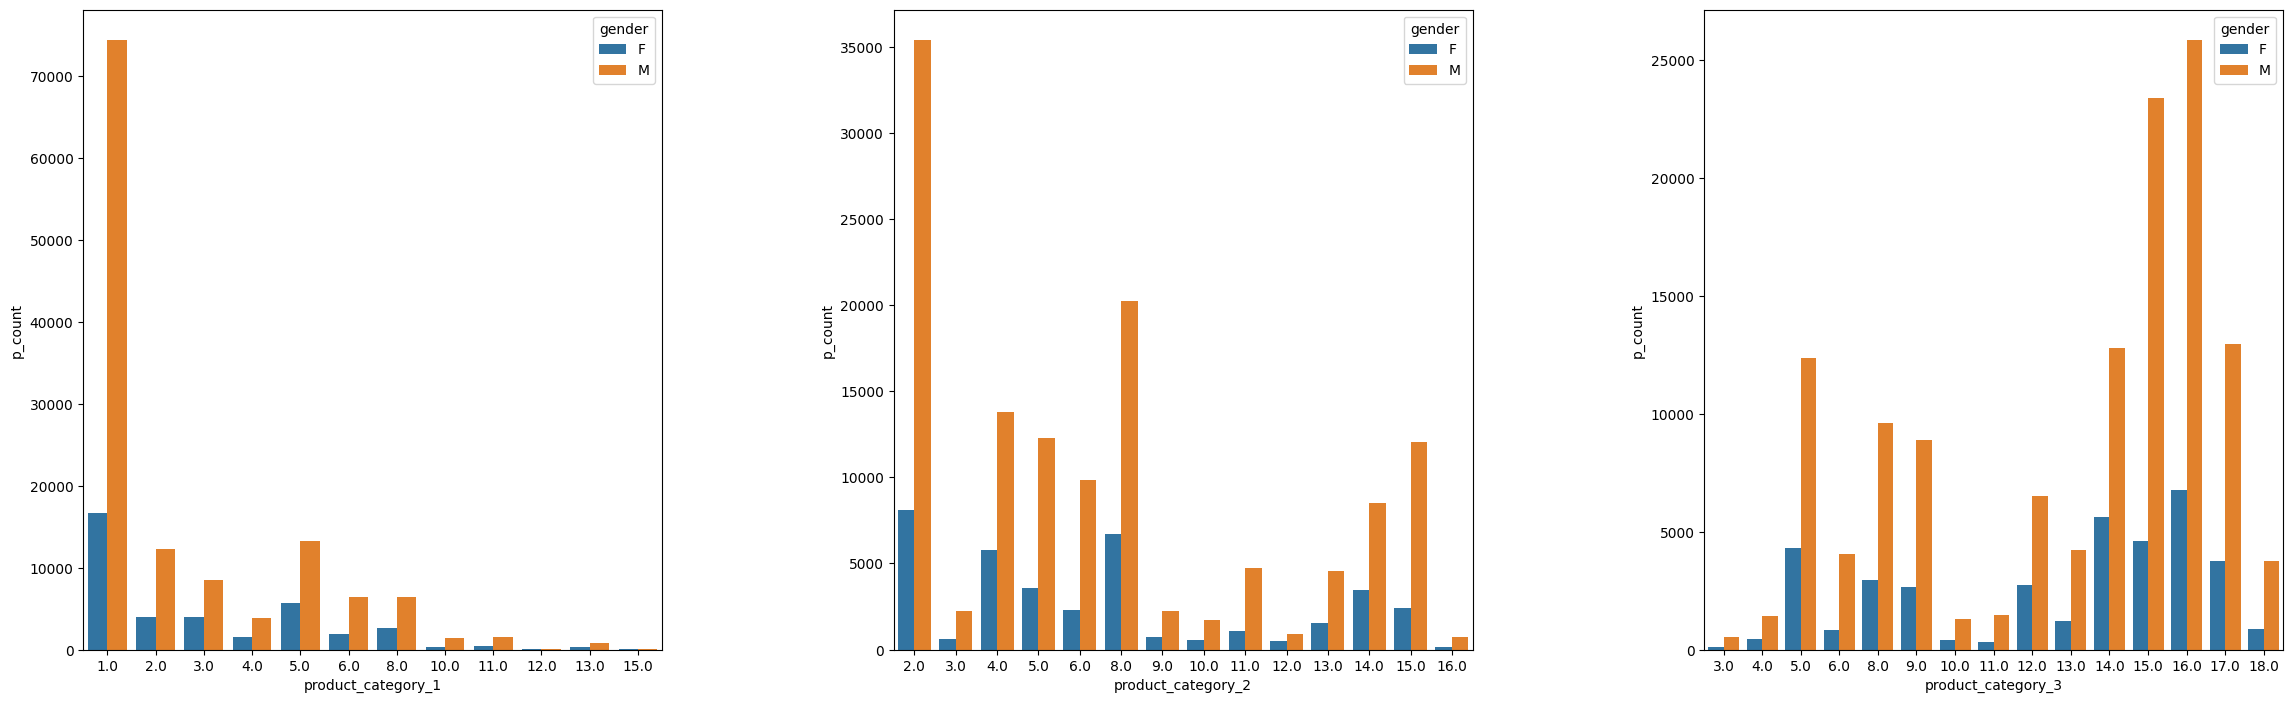

In [49]:
# Group and count product categories by gender
category_cols = ['product_category_1', 'product_category_2', 'product_category_3']
category_data = []

for category_col in category_cols:
    category_count = df.groupby('gender')[category_col].value_counts().rename('p_count').reset_index()
    category_data.append(category_count)

# Create subplots
plt.figure(figsize=(20, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

for i, category_col in enumerate(category_cols):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=category_col, y='p_count', hue='gender', data=category_data[i])

plt.show()

We observe that in almost all cases the products are being purchased more by men

**Getting purchase details of 'Married' and 'UnMarried' customers.{'UnMarried': 0, 'Married': 1}**

**7) Purchase Distribution of Married and UnMarried customers.**

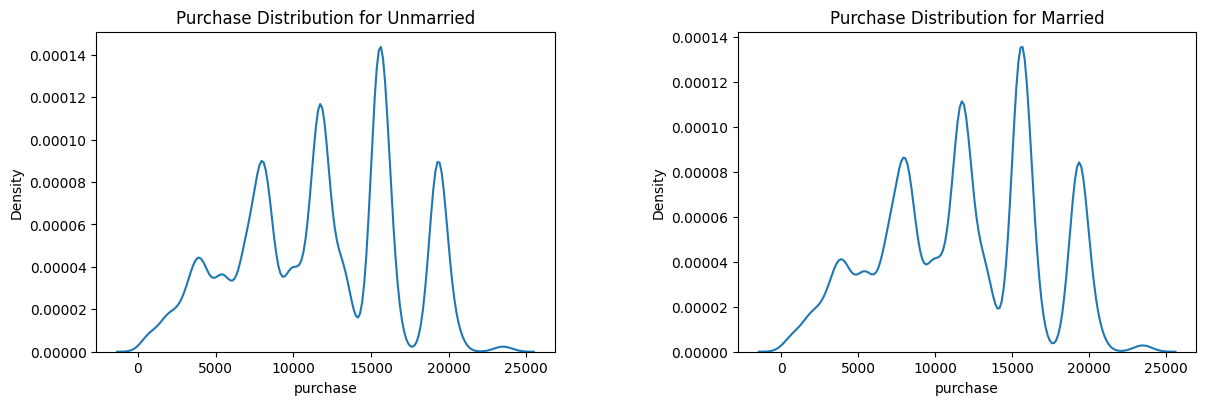

In [50]:
UM_P = df[df['marital_status'] == 0]['purchase']
M_P = df[df['marital_status'] == 1]['purchase']

# Creating a figure with two subplots
plt.figure(figsize=(10, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

# Subplot 1: KDE plot for unmarried
plt.subplot(1, 2, 1)
sns.kdeplot(UM_P)
plt.title('Purchase Distribution for Unmarried')

# Subplot 2: KDE plot for married
plt.subplot(1, 2, 2)
sns.kdeplot(M_P)
plt.title('Purchase Distribution for Married')

plt.show()

Purchase Distribution is similar for both the Marital groups

**8) Find which customer group visits more frequently ? UnMarried or Married? {'UnMarried': 0, 'Married': 1}**

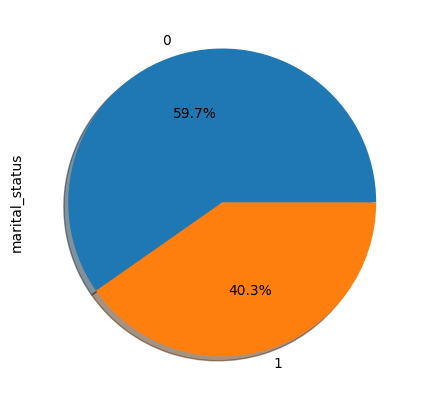

In [51]:
df.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

We observe that umarried customers visit more frequently

**9) Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them.**

,gender,marital_status,purchase
0,F,0,242637014
1,F,1,174082092
2,M,0,916818472
3,M,1,611280821


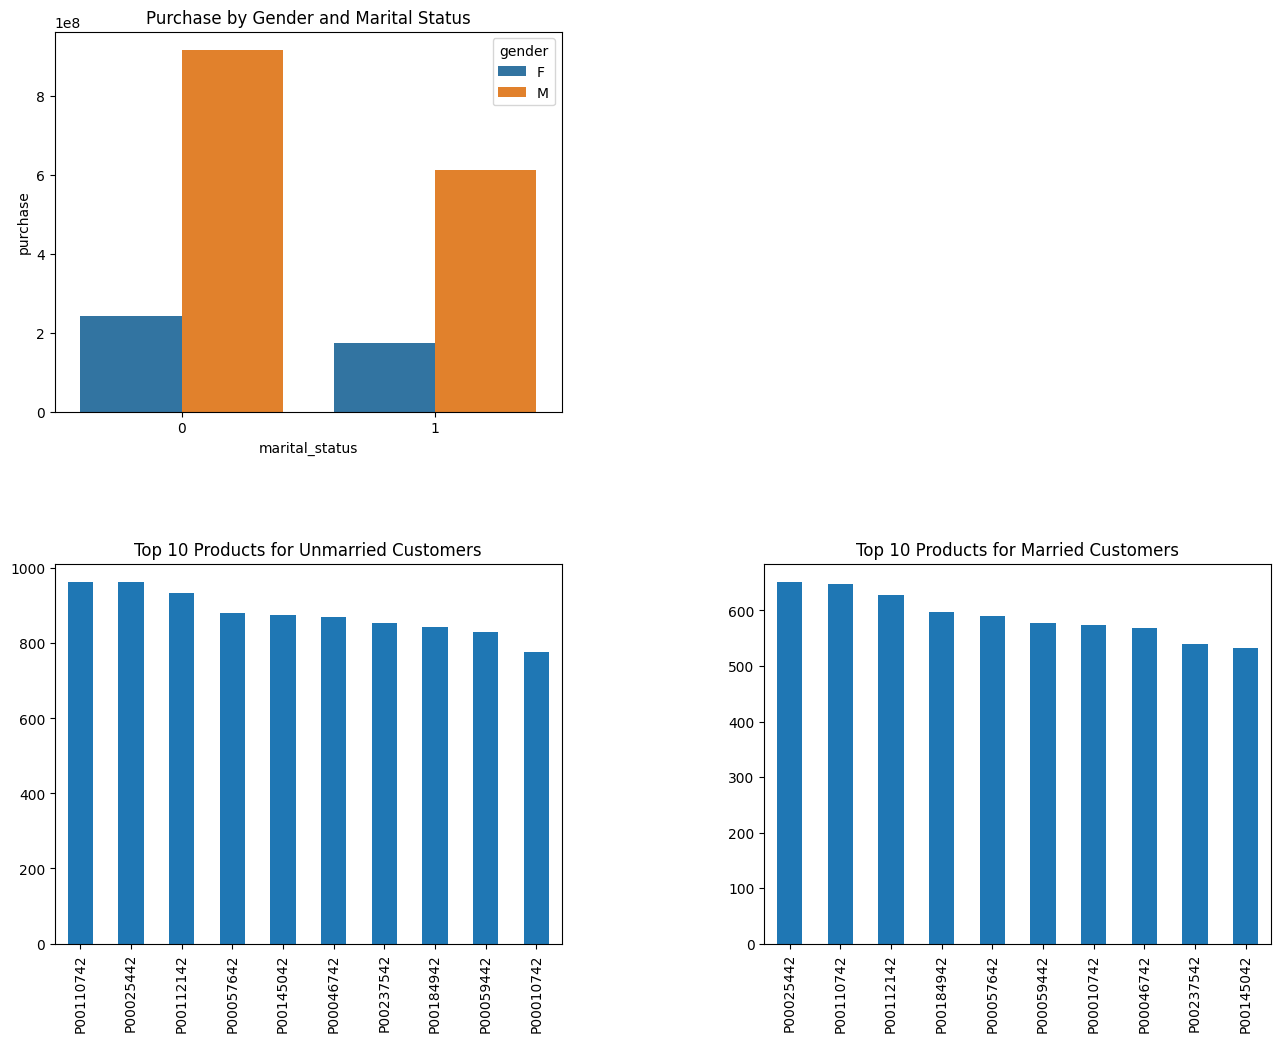

In [52]:
# Group and aggregate purchase by gender and marital status
M_UM_P = df.groupby(['gender', 'marital_status']).agg({'purchase': sum}).reset_index()

# Filter data for unmarried and married individuals and get the top 10 product counts
UM = df[df['marital_status'] == 0]['product_id'].value_counts().nlargest(10)
M = df[df['marital_status'] == 1]['product_id'].value_counts().nlargest(10)

# Create subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=2, wspace=0.4, hspace=0.4)

# Subplot 1: Bar plot for purchase by gender and marital status
plt.subplot(2, 2, 1)
sns.barplot(x='marital_status', y='purchase', hue='gender', data=M_UM_P)
plt.title('Purchase by Gender and Marital Status')

# Subplot 2: Bar plot for top 10 products for unmarried customers
plt.subplot(2, 2, 3)
UM.plot(kind='bar')
plt.title('Top 10 Products for Unmarried Customers')

# Subplot 3: Bar plot for top 10 products for married customers
plt.subplot(2, 2, 4)
M.plot(kind='bar')
plt.title('Top 10 Products for Married Customers')
M_UM_P
